## Data Preparation

In [1]:
# Connect google drive on Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install AutoGluon in the environment
!pip install -U pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install -U setuptools wheel

  Using cached setuptools-70.0.0-py3-none-any.whl.metadata (5.9 kB)
Using cached setuptools-70.0.0-py3-none-any.whl (863 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [4]:
# Install AutoGluon in the environment
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might n

In [4]:
# Import all required modules and packages
from autogluon.tabular import TabularDataset, TabularPredictor
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
# Define the directory path
dir_path = '/content/drive/MyDrive/Projets/Optimal_Functioning_(N=1066)'

In [6]:
# Change current directory to the selected directory path
os.chdir(dir_path)

In [7]:
# Import the raw data containing all the items
raw_data = pd.read_csv('./data/Base_1066_recodee_2017-06.txt', sep = '\s+', encoding='latin', na_values=999)

In [8]:
# check
raw_data.head(2)

,Id,Sexe,Age,Situfam,Enfant,Situpro,Typecontrat,Jourabsence,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,CodePostal,ZoneFR1,ZoneFR2,MHCA1,MHCA2,MHCA3,MHCA4,MHCA5,MHCA6,MHCA7,MHCA8,MHCA9,MHCA10,MHCA11,MHCA12,MHCA13,MHCA14,MHCB1,MHCB2,MHCB3,MHCB4,MHCB5,MHCB6,MHCB7,MHCB8,MHCB9,MHCB10,MHCB11,MHCB12,MHCB13,MHCB14,MHCC1,MHCC2,MHCC3,MHCC4,MHCC5,MHCC6,MHCC7,MHCC8,MHCC9,MHCC10,MHCC11,MHCC12,MHCC13,MHCC14,PE1,PE2,PE3,PE4,PE5,PE6,PE7,PE8,PE9,PE10,PE11,PE12,PE13,PE14,PE15,PE16,PE17,PE18,PE19,PE20,Flux1,Flux2,Flux3,Flux4,Flux5,Flux6,Flux7,Flux8,Flux9,Flux10,Flux11,Flux12,Flux13,Cap1,Cap2,Cap3,AD1,AD2,AD3,AD4,AD5,AD6,AD7,AD8,AD9,AD10,EfP1,EfP2,EfP3,EfP4,EfP5,EfP6,EfP7,EfP8,UF1,UF2,UF3,UF4,UF5,UF6,HSE1,HSE2,HSE3,HSE4,HSE5,HSE6,HSE7,HSE8,HSE9,HSE10,HSE11,HSE12,HSE13,HSE14,HSE15,HSE16,HSE17,HSE18,HSE19,HSE20,HSE21,HSE22,HSE23,HSE24,HSE25,HSE26,HSE27,HSE28,HSE29,HSE30,HSE31,HSE32,HSE33,HSE34,HSE35,ALQ1,ALQ2,ALQ3,ALQ4,ALQ5,ALQ6,ALQ7,ALQ8,ALQ9,ALQ10,ALQ11,ALQ12,ALQ13,ALQ14,ALQ15,ALQ16,abs1,abs2,abs3,abs4,abs5,abs6,abs7,abs8,abs9,abs10,abs11,Imp1,Imp2,Imp3,Imp4,Imp5,Imp6,Force1,Force2,Force3,Force4,Force5,Force6,Force7,Force8,Force9,Force10,Force11,Force12,Force13,Force14,Force15,Force16,Force17,Force18,Force19,Force20,Force21,Force22,Force23,Force24,DÃ.marche,ExperDP,PratDP,cabs1,cabs2,cabs3,cabs4,cabs5,cabs6,cabs7
0,303,2,43,1,1,2,6,1.0,2,2,1,1,5,56,11,69008.0,5,8,6.0,5.0,5.0,NaN,1.0,NaN,NaN,NaN,5.0,5.0,5.0,6.0,6.0,6.0,6.0,5.0,5.0,1.0,1.0,1.0,5.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,NaN,NaN,4.0,1.0,1.0,NaN,6.0,5.0,2.0,6.0,NaN,6.0,5.0,5.0,5.0,NaN,NaN,5.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,NaN,5.0,1.0,NaN,4,7,4,5.0,5.0,6.0,5.0,6.0,5.0,4.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,NaN,5.0,5.0,5.0,3.0,5.0,3.0,3.0,NaN,4.0,3.0,4.0,5.0,3.0,NaN,5.0,5.0,3.0,NaN,5.0,3.0,2.0,5.0,NaN,4.0,NaN,5.0,NaN,5.0,3.0,4.0,5.0,3.0,3.0,4.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180,180,0,0,0,0,0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,1.0,4.0,1.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0,5.0,8.0,8.0,8.0,9.0,9.0,9.0,8.0,9.0,2,NaN,NaN,7,10,0,0,0,0,0
1,864,1,56,2,2,2,1,1.0,3,2,1,1,6,63,5,47240.0,4,7,1.0,2.0,1.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,3.0,2.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,4.0,1.0,1.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,5.0,6.0,1.0,6.0,1.0,1.0,6.0,2.0,2.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,6.0,4,3,4,4.0,2.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0,5.0,4.0,3.0,4.0,1.0,4.0,1.0,1.0,2.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,3.0,1.0,3.0,4.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144,144,0,0,0,0,0,5.0,3.0,5.0,4.0,3.0,4.0,2.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,6.0,4.0,7.0,7.0,5.0,4.0,4.0,5.0,8.0,4.0,6.0,8.0,7.0,8.0,6.0,3.0,6.0,7.0,4.0,3.0,2,NaN,NaN,7,10,0,0,0,0,0


In [9]:
# replace variables to be consistent with previous research
raw_data.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)

In [10]:
# import the data with the factors scores, the probability and the FOP class
var_names = ['FOP','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_FOP','ID']
clfop_data = pd.read_csv('./data/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [11]:
# this to allow the possibility to compare quality of prediction with or wihout factor scores
'''
Set this variable True if you want to include the factor scores
'''
include_factor_scores = False

In [12]:
# define the columns of the factor score data with the raw data
if include_factor_scores:
  clfop_df = clfop_data.drop(columns=['CPROB1','CPROB2','CPROB3','CPROB4'])
else:
  clfop_df = clfop_data[['ID','CL_FOP']]

In [13]:
# now merge the raw data with factor score data
data = pd.merge(raw_data, clfop_df, left_on='Id',right_on='ID').drop(columns='ID')

In [14]:
# check the number of missing values
col_miss = data.isnull().sum()
col_miss

Id               0
Sexe             0
Age              0
Situfam          0
Enfant           0
Situpro          0
Typecontrat      0
GenAbs           1
Revenus          0
Nivetude         0
Taillentrep      0
Manager          0
CSP1             0
CSP2             0
Secteur          0
CodePostal       4
ZoneFR1          0
ZoneFR2          0
MHCA1           12
MHCA2            7
MHCA3           15
MHCA4           84
MHCA5           33
MHCA6           92
MHCA7           64
MHCA8           66
MHCA9           29
MHCA10          13
MHCA11          14
MHCA12          38
MHCA13          11
MHCA14          38
MHCB1           22
MHCB2           15
MHCB3           14
MHCB4           82
MHCB5           49
MHCB6          109
MHCB7           56
MHCB8           70
MHCB9           37
MHCB10          16
MHCB11          17
MHCB12          43
MHCB13          11
MHCB14          40
MHCC1            8
MHCC2            7
MHCC3           10
MHCC4          111
MHCC5           40
MHCC6          103
MHCC7       

In [15]:
# select for removal those variable that have more than 50% missing values
to_drop = data.columns[col_miss > 0.5*len(data)]

In [16]:
# drop those columns with more than 50% missing values
data = data.drop(columns = to_drop)

In [17]:
# check
data.isnull().sum()

Id               0
Sexe             0
Age              0
Situfam          0
Enfant           0
Situpro          0
Typecontrat      0
GenAbs           1
Revenus          0
Nivetude         0
Taillentrep      0
Manager          0
CSP1             0
CSP2             0
Secteur          0
CodePostal       4
ZoneFR1          0
ZoneFR2          0
MHCA1           12
MHCA2            7
MHCA3           15
MHCA4           84
MHCA5           33
MHCA6           92
MHCA7           64
MHCA8           66
MHCA9           29
MHCA10          13
MHCA11          14
MHCA12          38
MHCA13          11
MHCA14          38
MHCB1           22
MHCB2           15
MHCB3           14
MHCB4           82
MHCB5           49
MHCB6          109
MHCB7           56
MHCB8           70
MHCB9           37
MHCB10          16
MHCB11          17
MHCB12          43
MHCB13          11
MHCB14          40
MHCC1            8
MHCC2            7
MHCC3           10
MHCC4          111
MHCC5           40
MHCC6          103
MHCC7       

## Recode Categorical Variables

In [18]:
# Recode the Demarche Column
data.rename(columns={'DÃ.marche':'Demarche'}, inplace=True)
data.columns[196]

'Demarche'

In [19]:
# recoding all categorical variables

data['Sexe'].replace({1:"Masculin",2:"Féminin"}, inplace=True)
data['Situfam'].replace({1:"Vit seul(e)", 2:"Vit en couple"}, inplace=True)
data['Situpro'].replace({1:"Indépendant", 2:"Salarié", 5:"En transition"}, inplace=True)
data['Revenus'].replace({1:'moins de 6000€', 2:'entre 6000€ et 11900€', 3:'entre 11901€ et 26490€', 4:'entre 26491€ et 70900€', 5:'entre 70901€ et 150000€', 6:'plus de 150001€'}, inplace=True)
data['Nivetude'].replace({1:'sans diplôme ou brevet de collège', 2: 'CAP/BEP', 3:'Baccalauréat', 4:'Bac+2 / +3', 5:'Bac+4 / Bac+5', 6:'Doctorat'}, inplace=True)
data['Taillentrep'].replace({1:"TPE (Moins de 10 salariés)",
                                 2:"Petite PME-PMI (Entre 10 et 49 salariés)",
                                 3:"Moyenne PME-PMI (Entre 50  et 199  salariés)",
                                 4:"Grande PME-PMI (Entre 200 et 499 salariés)",
                                 5:"Entreprise de Taille Intermédiaire (Entre 500 et 2000 salariés)",
                                 6:"Grands Groupes (Plus de 2000 salariés)"},inplace=True)
data['Manager'].replace({1:"Non", 2:"Manager intermédiaire ", 3:"Manager supérieur", 4:"Chef d'Entreprise"},inplace=True)
data['CSP1'].replace({1:"Agriculteurs",
                          2:"Artisans, commerçants et chefs d'entreprises",
                          3:"Cadres, professions intellectuelles supérieures et professions libérales",
                          4:"Professions intermédiaires",
                          5:"Employés",
                          6:"Ouvriers"},inplace=True)
data['CSP2'].replace({10:"Agriculteurs",
                          21:"Artisans",
                          22:"Commerçants et assimilés",
                          23:"Chefs d'entreprise de 10 salariés ou plus",
                          31:"Professions libérales",
                          33:"Cadres de la fonction publique",
                          34:"Professeurs, professions scientifiques",
                          35:"Professions de l'information, des arts et des spectacles",
                          37:"Cadres administratifs et commerciaux d'entreprises",
                          38:"Ingénieurs et cadres techniques d'entreprises",
                          42:"Professeurs des écoles, instituteurs et professions assimilées",
                          43:"Professions intermédiaires de la santé et du travail social",
                          44:"Clergé, religieux",
                          45:"Professions intermédiaires administratives de la fonction publique",
                          46:"Professions intermédiaires administratives et commerciales des entreprises",
                          47:"Techniciens (sauf techniciens tertiaires)",
                          48:"Contremaîtres, agents de maîtrise (maîtrise administrative exclue)",
                          52:"Employés civils et agents de service de la fonction publique",
                          53:"Agents de surveillance",
                          54:"Employés administratifs d'entreprise",
                          55:"Employés de commerce",
                          56:"Personnels des services directs aux particuliers",
                          62:"Ouvriers qualifiés de type industriel",
                          63:"Ouvriers qualifiés de type artisanal",
                          64:"Chauffeurs",
                          65:"Ouvriers qualifiés de la manutention, du magasinage et du transport",
                          67:"Ouvriers non qualifiés de type industriel",
                          68:"Ouvriers non qualifiés de type artisanal",
                          69:"Ouvriers agricoles et assimilés"}, inplace=True)
data['Secteur'].replace({1:"Industrie",
                             2:"Construction",
                             3:"Commerce et réparation",
                             4:"Transports et entreposages",
                             5:"Hébergement et restauration",
                             6:"Information et communication",
                             7:"Activités financières et d’assurance",
                             8:"Activités immobilières",
                             9:"Soutien aux entreprises",
                             10:"Enseignement, santé et action sociale",
                             11:"Services aux ménages",
                             12:"Autre"},inplace=True)
data['CL_FOP'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)
data['ZoneFR1'].replace({0:np.nan,1:'Ile de France',2:'Nord-Ouest',3:'Nord Est',4:'Sud-Ouest',5:'Sud Est'}, inplace=True)
data['ZoneFR2'].replace({0:np.nan,1:'Ile de France',2:'Banlieue Parisienne Ouest',3:'Ouest',4:'Nord',5:'Est',6:'Banlieue Parisienne Est',7:'Sud-Ouest',8:'Centre Est',9:'Méditerranée'},inplace=True)
data['Typecontrat'].replace({1:'Temps plein contrat 35h', 2:'Temps plein forfait', 3:'Mi-temps contrat 35h', 4:'Mi-temps forfait', 5:'Durée hébdomadaire', 6:'Je ne sais pas'} ,inplace=True)
data['Demarche'].replace({1:'Oui', 2:'Non'},inplace=True)

In [20]:
# get ready for Machine Learning : remove the ID and Postal Code variables
df = data.drop(columns=['Id','CodePostal'])

In [21]:
# define the outcome
outcome = 'CL_FOP'

In [22]:
# generate train and test data
train_data, test_data = train_test_split(df, test_size=0.2, stratify=data[outcome], random_state=0)

In [23]:
path_to_model_data = "./no_factor_models_data"
presets = "good_quality"

In [24]:
# fit AutoGluon's tabular predictor
try:
  predictor = TabularPredictor.load(path_to_model_data)
except:
  predictor = TabularPredictor(label=outcome, path=path_to_model_data).fit(train_data, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [25]:
# check the first predicted classes
y_pred = predictor.predict(test_data)
y_pred.head()  # Predictions

908    Self-Motivated Functioning
708      Resilient Dysfunctioning
959          Fully Dysfunctioning
163    Self-Motivated Functioning
86       Resilient Dysfunctioning
Name: CL_FOP, dtype: object

In [26]:
# check the first predicted probabilities
y_pred_proba = predictor.predict_proba(test_data)
y_pred_proba.head()  # Prediction Probabilities

,Emotionally Functioning,Fully Dysfunctioning,Resilient Dysfunctioning,Self-Motivated Functioning
908,0.010287,0.029590,0.086127,0.873996
708,0.009535,0.030902,0.715991,0.243572
959,0.008756,0.904964,0.050047,0.036233
163,0.035916,0.077280,0.398336,0.488468
86,0.012647,0.131526,0.799628,0.056198


In [27]:
# evaluate performance on test data
predictor.evaluate(test_data)

{'accuracy': 0.7757009345794392,
 'balanced_accuracy': 0.667319749216301,
 'mcc': 0.6696900820018272}

In [28]:
# check the leaderboard
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1_FULL,0.785047,NaN,accuracy,0.025407,NaN,0.413239,0.025407,NaN,0.413239,1,True,21
1,LightGBM_BAG_L1_FULL,0.775701,NaN,accuracy,0.013967,NaN,0.421900,0.013967,NaN,0.421900,1,True,15
2,WeightedEnsemble_L2_FULL,0.775701,NaN,accuracy,0.018528,NaN,0.584158,0.004561,NaN,0.162258,2,True,24
3,CatBoost_BAG_L1_FULL,0.757009,NaN,accuracy,0.027760,NaN,4.408145,0.027760,NaN,4.408145,1,True,18
4,LightGBMXT_BAG_L1_FULL,0.742991,NaN,accuracy,0.024124,NaN,1.768802,0.024124,NaN,1.768802,1,True,14
5,LightGBMLarge_BAG_L1_FULL,0.742991,NaN,accuracy,0.064487,NaN,2.966465,0.064487,NaN,2.966465,1,True,23
6,RandomForestGini_BAG_L1_FULL,0.714953,NaN,accuracy,0.108414,0.144521,0.923447,0.108414,0.144521,0.923447,1,True,16
7,RandomForestGini_BAG_L1,0.714953,0.713615,accuracy,0.110042,0.144521,0.923447,0.110042,0.144521,0.923447,1,True,4
8,RandomForestEntr_BAG_L1,0.710280,0.735915,accuracy,0.108282,0.138960,0.867196,0.108282,0.138960,0.867196,1,True,5
9,RandomForestEntr_BAG_L1_FULL,0.710280,NaN,accuracy,0.114428,0.138960,0.867196,0.114428,0.138960,0.867196,1,True,17


In [29]:
# generate feature importance dataframe
importance = predictor.feature_importance(test_data)

Computing feature importance via permutation shuffling for 202 features using 214 rows with 5 shuffle sets...
	37.89s	= Expected runtime (7.58s per shuffle set)
	5.9s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [30]:
# convert into percentage of the maximum importance value and sort
importance_percent = importance.sort_values(by='importance')/importance.max()*100

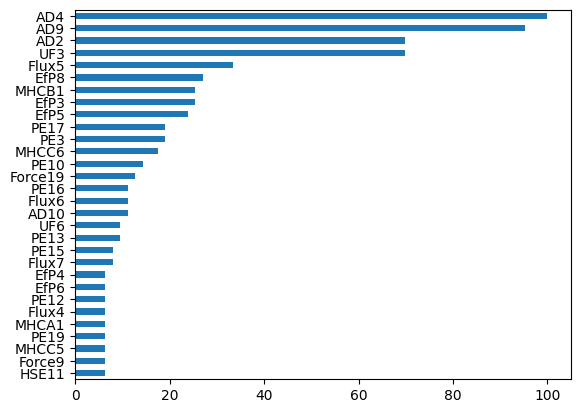

In [31]:
# plot the 30 highest importance values
importance_percent['importance'][-30:].plot(kind='barh')
plt.show()

In [32]:
# select only those feature for which importance is greater than 20% of the highest importance values
items_above_20_percent = importance_percent[importance_percent['importance'] > 20]

In [33]:
items_above_20_percent

,importance,stddev,p_value,n,p99_high,p99_low
EfP5,23.809524,22.530295,0.128696,100.0,24.815837,16.376401
EfP3,25.396825,78.694939,5.501109,100.0,50.974730,-69.471524
MHCB1,25.396825,43.337889,1.025248,100.0,35.124650,-13.236924
EfP8,26.984127,82.166106,5.280687,100.0,53.511861,-71.511650
Flux5,33.333333,64.516948,1.527708,100.0,49.524203,-29.518301
UF3,69.841270,33.417829,0.009342,100.0,58.147144,100.000000
AD2,69.841270,100.000000,0.570419,100.0,87.995017,-5.897460
AD9,95.238095,82.781591,0.093608,100.0,95.973110,77.179058
AD4,100.000000,85.199080,0.086806,100.0,100.000000,83.776163


In [34]:

# Make a copy of the DataFrame slice
items_above_20_percent_copy = items_above_20_percent.copy()

# Now rename the index on the copied DataFrame
items_above_20_percent_copy.rename(index={'AD9':'AD9 - Mes sentiments sont pris en considération au travail',
                                          'AD4': "AD4 - Je m'entends bien avec les collègues de travail",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'UF3':"UF3 - Je m'appuie sur mes forces les plus développées dans mon travail",
                                          'EfP3' : "EfP3 - C'est facile pour moi de me fixer sur mes objectifs et d'accomplir mes buts.",
                                          'PE10': "PE10 - (J'ai ressenti) de la haine ou de la méfiance ou de la suspicion",
                               'Flux6':"Flux6 - Je suis entièrement absorbé par ce que je fais",
                               'AD2':"AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille",
                               'MHCA1':"MHCA1 - (Je suis) heureux",
                               'EfP8':"EfP8 - Peu importe ce qui arrive, généralement je suis capable d'y faire face",
                               'PE11':"PE1 - (Je suis) rassuré ou optimiste ou plein d’espoir",
                               'Flux5':"Flux5 - Mon esprit est tout à fait clair"}, inplace=True)

# Now you can use items_above_20_percent_copy without the error
items_above_20_percent_copy


,importance,stddev,p_value,n,p99_high,p99_low
EfP5,23.809524,22.530295,0.128696,100.0,24.815837,16.376401
EfP3 - C'est facile pour moi de me fixer sur mes objectifs et d'accomplir mes buts.,25.396825,78.694939,5.501109,100.0,50.974730,-69.471524
MHCB1,25.396825,43.337889,1.025248,100.0,35.124650,-13.236924
"EfP8 - Peu importe ce qui arrive, généralement je suis capable d'y faire face",26.984127,82.166106,5.280687,100.0,53.511861,-71.511650
Flux5 - Mon esprit est tout à fait clair,33.333333,64.516948,1.527708,100.0,49.524203,-29.518301
UF3 - Je m'appuie sur mes forces les plus développées dans mon travail,69.841270,33.417829,0.009342,100.0,58.147144,100.000000
AD2 - J'apprécie vraiment les personnes avec lesquelles je travaille,69.841270,100.000000,0.570419,100.0,87.995017,-5.897460
AD9 - Mes sentiments sont pris en considération au travail,95.238095,82.781591,0.093608,100.0,95.973110,77.179058
AD4 - Je m'entends bien avec les collègues de travail,100.000000,85.199080,0.086806,100.0,100.000000,83.776163


In [35]:
# select the features above the 20% threshold
list(items_above_20_percent.index) + [outcome]

['EfP5',
 'EfP3',
 'MHCB1',
 'EfP8',
 'Flux5',
 'UF3',
 'AD2',
 'AD9',
 'AD4',
 'CL_FOP']

In [36]:
# create anew dataframe with only those features
df_simple = df.loc[:,list(items_above_20_percent.index) + [outcome]]
df_simple.info()
df_simple.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EfP5    1059 non-null   float64
 1   EfP3    1058 non-null   float64
 2   MHCB1   1044 non-null   float64
 3   EfP8    1062 non-null   float64
 4   Flux5   1052 non-null   float64
 5   UF3     1055 non-null   float64
 6   AD2     1060 non-null   float64
 7   AD9     1055 non-null   float64
 8   AD4     1053 non-null   float64
 9   CL_FOP  1066 non-null   object 
dtypes: float64(9), object(1)
memory usage: 83.4+ KB


,EfP5,EfP3,MHCB1,EfP8,Flux5,UF3,AD2,AD9,AD4,CL_FOP
0,5.0,6.0,6.0,5.0,6.0,6.0,5.0,6.0,5.0,Self-Motivated Functioning
1,1.0,3.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0,Resilient Dysfunctioning
2,5.0,4.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,Fully Dysfunctioning
3,6.0,6.0,1.0,6.0,5.0,6.0,2.0,2.0,4.0,Resilient Dysfunctioning
4,5.0,5.0,1.0,5.0,1.0,5.0,1.0,6.0,4.0,Resilient Dysfunctioning


In [37]:
# split that simple dataframe into a training and test set
simple_train, simple_test = train_test_split(df_simple, test_size=0.2, stratify=df_simple[outcome], random_state=0)

In [38]:
path_to_model_simple = "./no_factor_models_simple"

In [39]:
# fit with TabularPredictor
try:
  simple_model = TabularPredictor.load(path_to_model_simple)
except:
  simple_model = TabularPredictor(label=outcome, path=path_to_model_simple).fit(simple_train, presets=presets)

This means that the predictor was fit in a version `<=0.3.1`.
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-f

In [40]:
# Evaluate model
simple_model.evaluate(simple_test)

{'accuracy': 0.7616822429906542,
 'balanced_accuracy': 0.7395506792058516,
 'mcc': 0.6532939262570396}

In [41]:
# Check the leaderboard on the test sample
lead_df = simple_model.leaderboard(simple_test)
lead_df

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L1_FULL,0.780374,NaN,accuracy,0.007004,NaN,0.161286,0.007004,NaN,0.161286,1,True,18
1,LightGBM_BAG_L1_FULL,0.761682,NaN,accuracy,0.009122,NaN,0.371539,0.009122,NaN,0.371539,1,True,15
2,WeightedEnsemble_L2_FULL,0.761682,NaN,accuracy,0.012828,NaN,0.548746,0.003706,NaN,0.177207,2,True,24
3,NeuralNetFastAI_BAG_L1_FULL,0.761682,NaN,accuracy,0.020605,NaN,0.755294,0.020605,NaN,0.755294,1,True,13
4,ExtraTreesGini_BAG_L1_FULL,0.752336,NaN,accuracy,0.105857,0.113810,0.837551,0.105857,0.113810,0.837551,1,True,19
5,RandomForestGini_BAG_L1,0.752336,0.718310,accuracy,0.105984,0.112234,0.906342,0.105984,0.112234,0.906342,1,True,4
6,ExtraTreesGini_BAG_L1,0.752336,0.723005,accuracy,0.106460,0.113810,0.837551,0.106460,0.113810,0.837551,1,True,7
7,RandomForestGini_BAG_L1_FULL,0.752336,NaN,accuracy,0.112136,0.112234,0.906342,0.112136,0.112234,0.906342,1,True,16
8,RandomForestEntr_BAG_L1_FULL,0.747664,NaN,accuracy,0.104343,0.111847,0.777994,0.104343,0.111847,0.777994,1,True,17
9,RandomForestEntr_BAG_L1,0.747664,0.717136,accuracy,0.106262,0.111847,0.777994,0.106262,0.111847,0.777994,1,True,5


### Check the performance of the best model on the test set

In [42]:
# load the simple model trained through validation sets
predictor = TabularPredictor.load(path_to_model_simple)

In [43]:
# select the best model based on the test set
best_model = lead_df.loc[0, "model"]

In [44]:
# compute the predicted outcome by that best model
y_pred = predictor.predict(simple_test, best_model)

In [45]:
# define the original outcome
y_test = simple_test[outcome]

In [46]:
# compute the performance using accuracy, kappa scores, precision recall and F1 score (on 0.5 threshold)
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

In [47]:
accuracy

0.780373831775701

In [48]:
kappa

0.677297227926078

In [49]:
print(classification_report(y_test, y_pred))

                            precision    recall  f1-score   support

   Emotionally Functioning       0.78      0.64      0.70        11
      Fully Dysfunctioning       0.79      0.78      0.78        58
  Resilient Dysfunctioning       0.77      0.80      0.79        87
Self-Motivated Functioning       0.79      0.78      0.78        58

                  accuracy                           0.78       214
                 macro avg       0.78      0.75      0.76       214
              weighted avg       0.78      0.78      0.78       214

